In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
import ast
def open_data(path,format_file):
    if format_file=='text_dict':
        file = open(path+".txt", "r")
        contents = file.read()
        #display(contents)
        dictionary = ast.literal_eval(contents)
        return dictionary
#dict_ece_cohen = open_data('metrics/kappa_and_ece','text_dict')
dict_ece_cohen = open_data('metrics/tmp_dct_rf_gbdt_full2','text_dict')

In [3]:
def mod_dict(res_dict, type_to_compare):
    tot_dict = {}
    for model_name in res_dict.keys():
        modified_subdict = {}
        for dataset in res_dict[model_name].keys():
            data_set_dict = res_dict[model_name][dataset]
            data_set_dict = {key:val for key,val in data_set_dict.items() if isinstance(val,type_to_compare)}
            modified_subdict[dataset] = data_set_dict        
        tot_dict[model_name] = modified_subdict
    return tot_dict

In [4]:
new_dict = {}
for key_met in dict_ece_cohen.keys():
    new_dict[key_met] = mod_dict(dict_ece_cohen[key_met],tuple)


In [5]:
cohens_results = new_dict['cohen_kappa']
ece_results = new_dict['ece']


In [6]:
def plot_times_fill(df,color, ax= None,label = None, title=None, xlabel = 'Data Size',ylabel=None): 
    list_vals = []; data_size_list = [] 
    df = df.astype(float)
    for col in df.columns:
        list_vals.extend(df[col].to_list()); data_size_list.extend([col]*len(df[col]))
        #display(list_vals)
        #display(data_size_list)
    ax.scatter(data_size_list,list_vals,marker = '.',color= color)
    ax.fill_between(df.columns, df.min(),df.max(),alpha=0.2,color=color)
    df.mean().plot(color= color, ax=ax, label = label)
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_title(title)

In [7]:
def plot_std(df,color, ax= None,label = None, title=None, xlabel = 'Data Size',ylabel=None): 
    list_vals = []; data_size_list = [] 
    df = df.astype(float)
    for col in df.columns:
        list_vals.extend(df[col].to_list()); data_size_list.extend([col]*len(df[col]))
    df.std().to_frame().plot(color= color, ax=ax, label = label)
    ax.legend('upper right')
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_title(title)

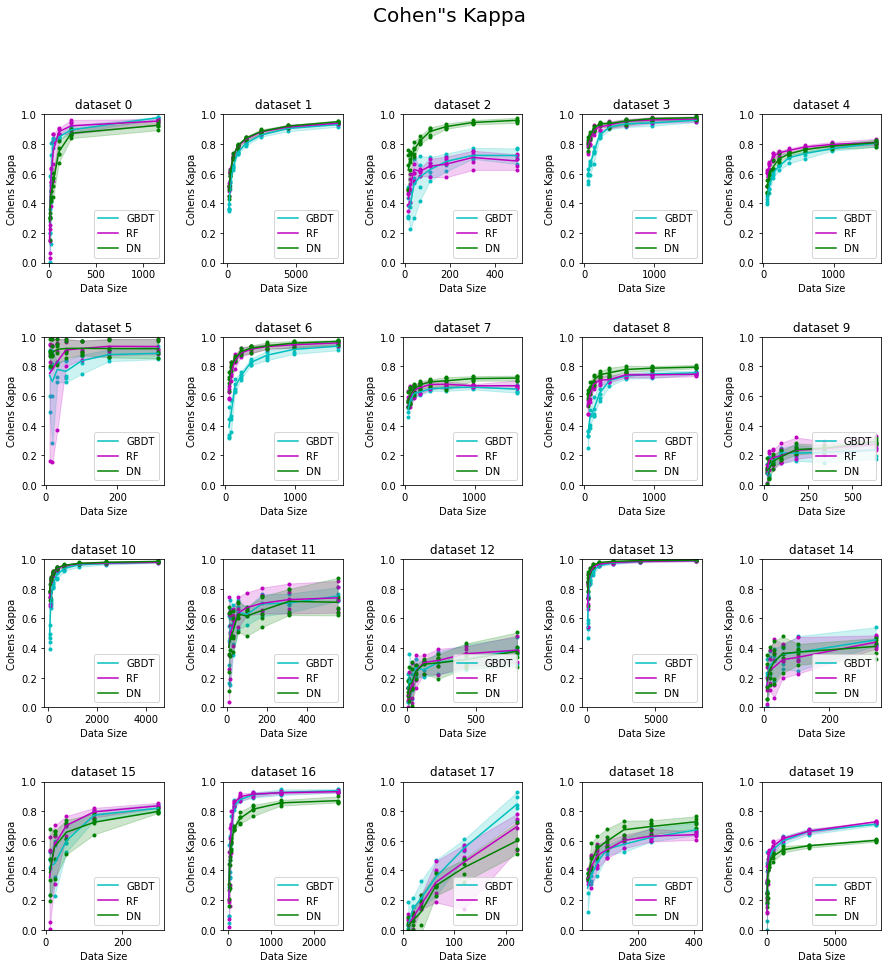

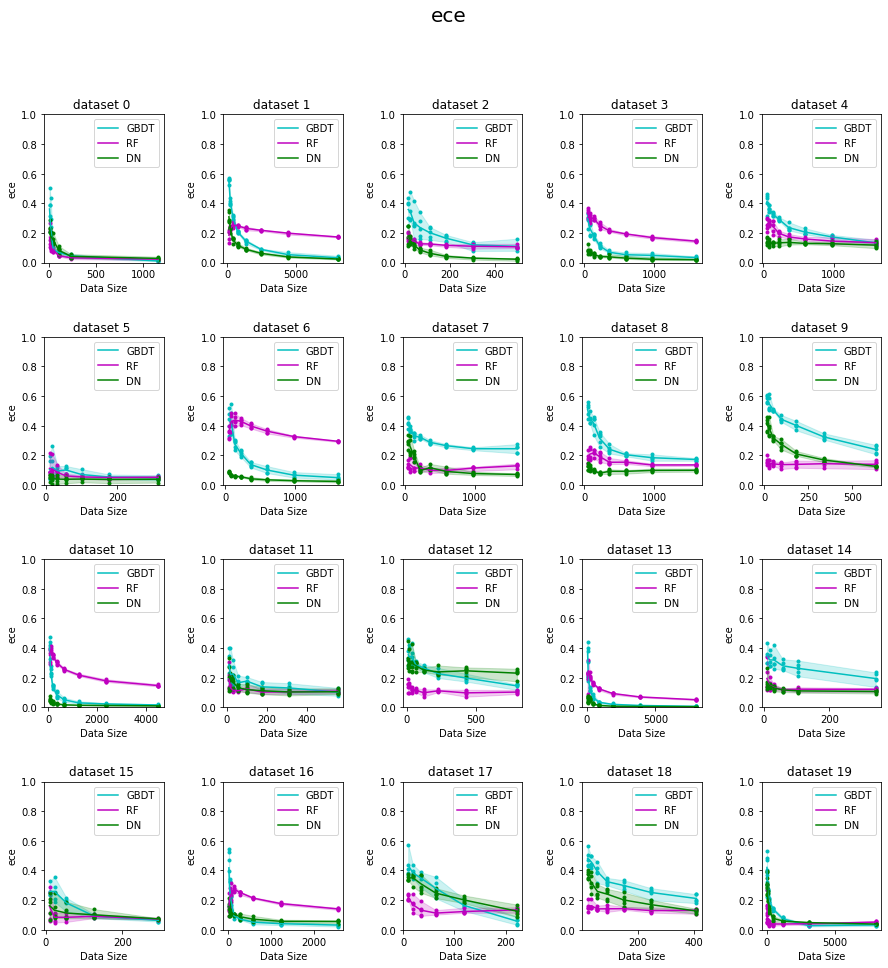

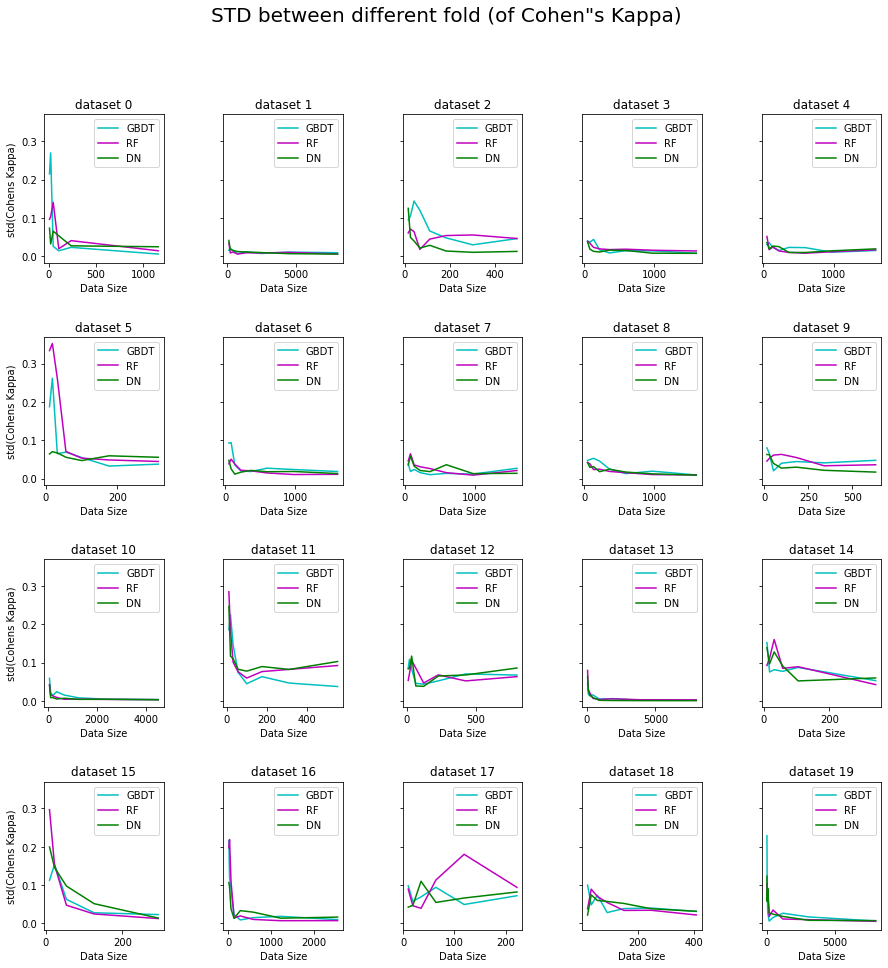

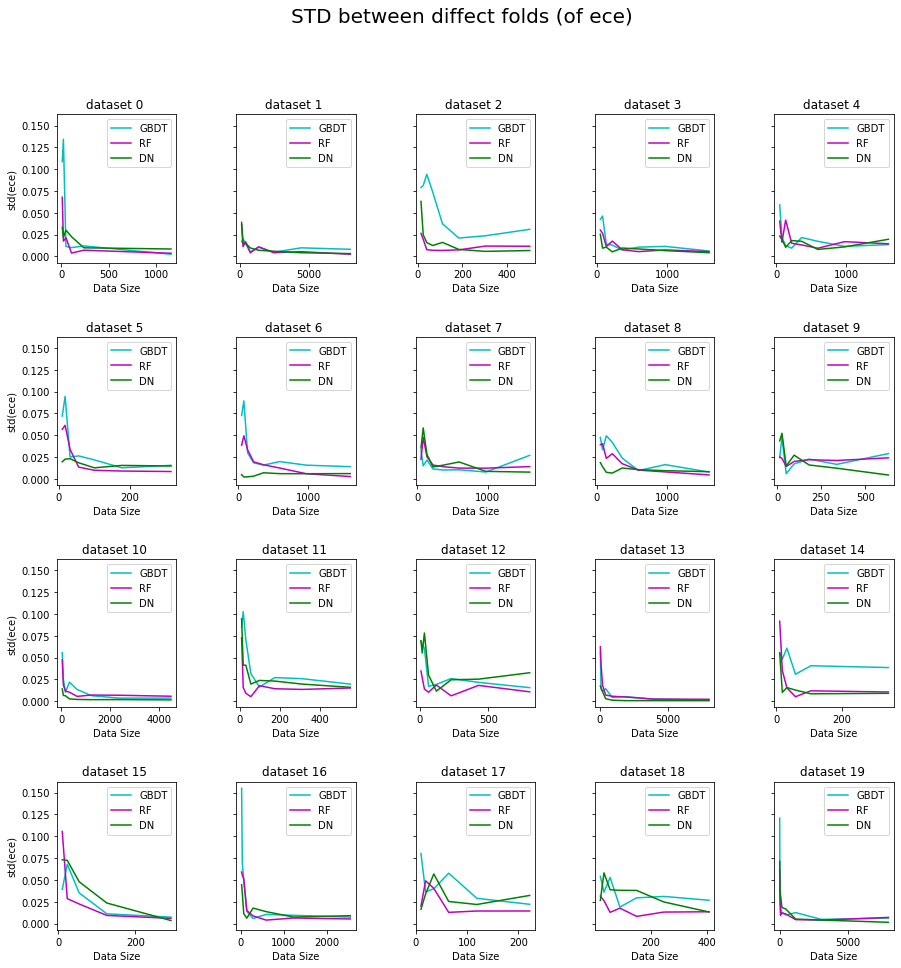

In [9]:
import warnings
warnings.filterwarnings("ignore")

fig_cohen, axs_c = plt.subplots(4,5, figsize= (15,15))
fig_ece, axs_e = plt.subplots(4,5, figsize= (15,15))
fig_cohen_std, axs_c_std = plt.subplots(4,5, figsize= (15,15),sharey= True)
fig_ece_std, axs_e_std = plt.subplots(4,5, figsize= (15,15),sharey = True)

available_colors = np.array(['c','blue','m','purple','green','lightgreen','crimson','red']).reshape(-1,2)
means_dfs = {'ece':{},'cohen_kappa':{}}
if not isinstance(axs_c,np.ndarray):
    axs_c=[axs_c]
if not isinstance(axs_c_std,np.ndarray):
    axs_c_std=[axs_c_std]
if not isinstance(axs_e,np.ndarray):
    axs_e=[axs_e]
if not isinstance(axs_e_std,np.ndarray):
    axs_e_std=[axs_e_std]
axs_ef = axs_e.flatten(); axs_cf = axs_c.flatten(); axs_cf_std = axs_c_std.flatten(); axs_ef_std = axs_e_std.flatten()
for model_num, model_name in enumerate(cohens_results.keys()):
    means_dfs['ece'][model_name] = pd.DataFrame()
    means_dfs['cohen_kappa'][model_name] = pd.DataFrame()
    cur_colors = available_colors[model_num]
    for dataset_num in cohens_results[model_name].keys():
        
        df_vals = pd.DataFrame(ece_results[model_name][dataset_num])    
        df_vals_mean = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['ece'][model_name] = pd.concat([means_dfs['ece'][model_name],df_vals_mean])
        
        axs_ef[dataset_num].set_ylim([0,1])
        axs_cf[dataset_num].set_ylim([0,1])        
        plot_times_fill(df_vals,available_colors[model_num][0],axs_ef[dataset_num],model_name, 'dataset %s '%dataset_num, ylabel ='ece')
        
        df_vals = pd.DataFrame(cohens_results[model_name][dataset_num])
        df_vals_mean = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['cohen_kappa'][model_name] = pd.concat([means_dfs['cohen_kappa'][model_name],df_vals_mean])
        plot_times_fill(df_vals,available_colors[model_num][0],axs_cf[dataset_num],model_name, 'dataset %s'%dataset_num, ylabel ='Cohens Kappa')
        
        ###
        df_vals = pd.DataFrame(cohens_results[model_name][dataset_num])
        df_vals_std = df_vals.std().to_frame().T; df_vals_std.columns = np.arange(df_vals_std.shape[1]); df_vals_std.index = [dataset_num]
        means_dfs['cohen_kappa'][model_name] = pd.concat([means_dfs['cohen_kappa'][model_name],df_vals_std])
        plot_std(df_vals,available_colors[model_num][0],axs_cf_std[dataset_num],label = model_name, title = 'dataset %s'%dataset_num, ylabel ='std(Cohens Kappa)')

        df_vals = pd.DataFrame(ece_results[model_name][dataset_num])    
        df_vals_std = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['ece'][model_name] = pd.concat([means_dfs['ece'][model_name],df_vals_mean])

        plot_std(df_vals,available_colors[model_num][0],axs_ef_std[dataset_num],label = model_name, title = 'dataset %s '%dataset_num, ylabel ='std(ece)')
        
        axs_cf[dataset_num].legend(loc = 'lower right')
        axs_cf_std[dataset_num].legend(list(cohens_results.keys()), loc = 'upper right')
        axs_ef[dataset_num].legend(loc = 'upper right')
        axs_ef_std[dataset_num].legend(list(cohens_results.keys()),loc = 'upper right')
        
        
fig_cohen.suptitle('Cohen"s Kappa',fontsize= 20)        
fig_ece.suptitle('ece',fontsize = 20)
fig_cohen_std.suptitle('STD between different fold (of Cohen"s Kappa) ',fontsize= 20)        
fig_ece_std.suptitle('STD between diffect folds (of ece)',fontsize = 20)
spacing = 0.5
fig_cohen.subplots_adjust(hspace= spacing,wspace= spacing)
fig_ece.subplots_adjust(hspace= spacing,wspace= spacing)
fig_cohen_std.subplots_adjust(hspace= spacing,wspace= spacing)
fig_ece_std.subplots_adjust(hspace= spacing,wspace= spacing)

In [12]:
def plot_counts_model(df, ax, title = 'Counts "winning" model',dict_to_names = ['GBDT','RF','DN'], type_to_check = 'ece'):
    if type_to_check =='ece':
        min_error = df.to_numpy().argmin(0)
    else:
        min_error = df.to_numpy().argmax(0)
    list_winner = [dict_to_names[min_error_spec] for min_error_spec in min_error]
    df_counts = pd.DataFrame(dict(Counter(list_winner)),index= ['counts'])
    df_counts.T.plot.bar(ax = ax, alpha = 0.4)
    ax.set_title(title)
    ax.set_ylabel('Counts')
    

NameError: name 'Counter' is not defined

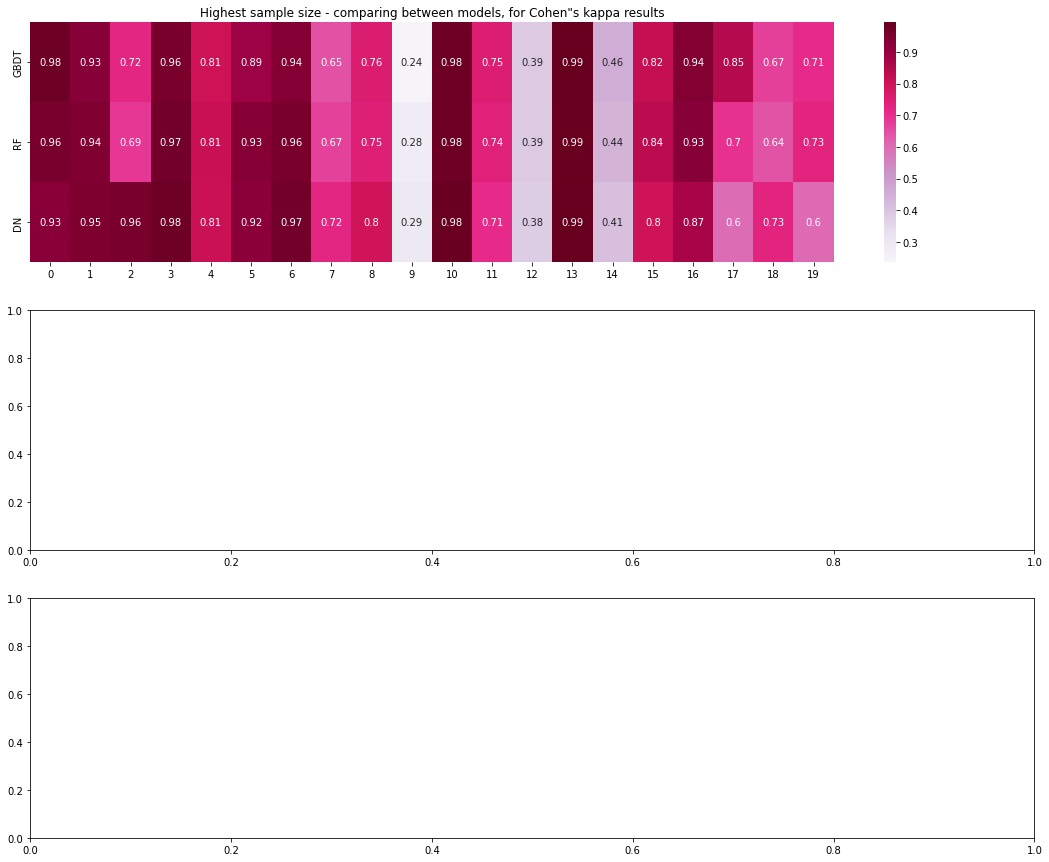

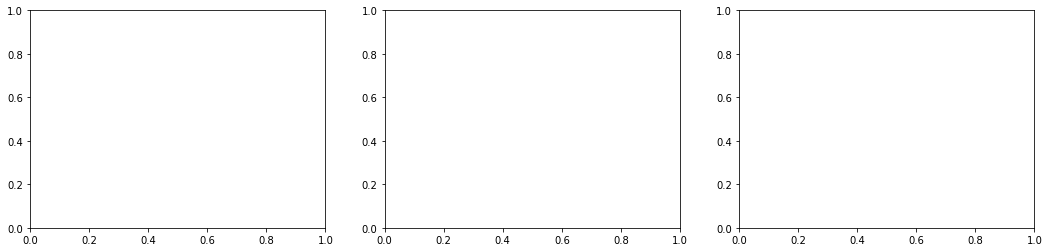

In [13]:
type_to_tale = 'highest'
new_dict_mean_highest = {};new_dict_mean_mid = {};new_dict_mean_lowest = {}
for model_name,model_vals in cohens_results.items():
    new_dict_mean_highest[model_name] = {}
    new_dict_mean_mid[model_name] = {}
    new_dict_mean_lowest[model_name] = {}
    for dataset_num,dataset_vals in model_vals.items():
        highest_key = max(dataset_vals.keys())
        highest_val_for_key = np.mean(np.array(dataset_vals[highest_key],dtype=float))
        new_dict_mean_highest[model_name][dataset_num] = highest_val_for_key
        
        sorted_keys = sorted(dataset_vals.keys())
        len_mid = int(np.ceil(len(dataset_vals.keys())/2))
        list_vals_dataset = list(dataset_vals.keys())
        mid_key = list_vals_dataset[len_mid]
        #np.median(dataset_vals.keys())
        
        mid_val_for_key = np.mean(np.array(dataset_vals[mid_key],dtype=float))
        new_dict_mean_mid[model_name][dataset_num] = mid_val_for_key
        
        lowest_key = min(dataset_vals.keys())
        lowest_val_for_key = np.mean(np.array(dataset_vals[lowest_key],dtype=float))
        new_dict_mean_lowest[model_name][dataset_num] = lowest_val_for_key        
        
        
metric = 'Cohen"s kappa'        
fig, ax = plt.subplots(3,1,figsize = (18,15))
fig2, axs = plt.subplots(1,3,figsize = (18,4))
df_highest = pd.DataFrame(new_dict_mean_highest).T
sns.heatmap(df_highest, cmap ='PuRd',annot=True, ax=ax[0]);
ax[0].set_title('Highest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_highest, axs[0], title = 'Highest sample size',type_to_check='cohen')


df_mid = pd.DataFrame(new_dict_mean_mid).T
sns.heatmap(df_mid, cmap ='PuRd',annot=True, ax=ax[1]);
ax[1].set_title('Mid sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_mid, axs[1], title = 'Mid sample size',type_to_check='cohen')

df_low = pd.DataFrame(new_dict_mean_lowest).T
sns.heatmap(df_low, cmap ='PuRd',annot=True, ax=ax[2]);
ax[2].set_title('Lowest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_low, axs[2], title = 'Lowest sample size',type_to_check='cohen'  )

[ax_spec.set_xlabel('Dataset #') for ax_spec in ax]

fig.subplots_adjust(wspace = 0.3, hspace=0.3)        
fig2.subplots_adjust(wspace = 0.3, hspace=0.3)   
fig2.suptitle('Counts "winning" model (cohens kappa) \n', fontsize= 16)        
    

In [ ]:
type_to_tale = 'highest'
new_dict_mean_highest = {};new_dict_mean_mid = {};new_dict_mean_lowest = {}
for model_name,model_vals in ece_results.items():
    new_dict_mean_highest[model_name] = {}
    new_dict_mean_mid[model_name] = {}
    new_dict_mean_lowest[model_name] = {}
    for dataset_num,dataset_vals in model_vals.items():
        highest_key = max(dataset_vals.keys())
        highest_val_for_key = np.mean(np.array(dataset_vals[highest_key],dtype=float))
        new_dict_mean_highest[model_name][dataset_num] = highest_val_for_key
        
        sorted_keys = sorted(dataset_vals.keys())
        len_mid = int(np.ceil(len(dataset_vals.keys())/2))
        list_vals_dataset = list(dataset_vals.keys())
        mid_key = list_vals_dataset[len_mid]
        #np.median(dataset_vals.keys())
        
        mid_val_for_key = np.mean(np.array(dataset_vals[mid_key],dtype=float))
        new_dict_mean_mid[model_name][dataset_num] = mid_val_for_key
        
        lowest_key = min(dataset_vals.keys())
        lowest_val_for_key = np.mean(np.array(dataset_vals[lowest_key],dtype=float))
        new_dict_mean_lowest[model_name][dataset_num] = lowest_val_for_key        
        
metric = 'ece'        
fig, ax = plt.subplots(3,1,figsize = (18,15))
fig2, axs = plt.subplots(1,3,figsize = (18,4))
df_highest = pd.DataFrame(new_dict_mean_highest).T
sns.heatmap(df_highest, cmap ='PuRd',annot=True, ax=ax[0]);
ax[0].set_title('Highest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_highest, axs[0], title = 'Highest sample size',type_to_check= 'ece')


df_mid = pd.DataFrame(new_dict_mean_mid).T
sns.heatmap(df_mid, cmap ='PuRd',annot=True, ax=ax[1]);
ax[1].set_title('Mid sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_mid, axs[1], title = 'Mid sample size',type_to_check= 'ece')

df_low = pd.DataFrame(new_dict_mean_lowest).T
sns.heatmap(df_low, cmap ='PuRd',annot=True, ax=ax[2]);
ax[2].set_title('Lowest sample size - comparing between models, for %s results'%metric)
plot_counts_model(df_low, axs[2], title = 'Lowest sample size'  ,type_to_check= 'ece')

[ax_spec.set_xlabel('Dataset #') for ax_spec in ax]

fig.subplots_adjust(wspace = 0.3, hspace=0.3)        
fig2.subplots_adjust(wspace = 0.3, hspace=0.3)   
fig2.suptitle('Counts "winning" model (ece) \n', fontsize= 16)

In [14]:
dict_to_names = ['GBDT','RF','DN']
from collections import Counter

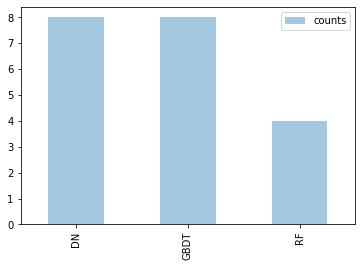

In [16]:
min_error = df_highest.to_numpy().argmin(0)
list_winner = [dict_to_names[min_error_spec] for min_error_spec in min_error]
df_counts = pd.DataFrame(dict(Counter(list_winner)),index= ['counts'])
df_counts.T.plot.bar(alpha = 0.4);

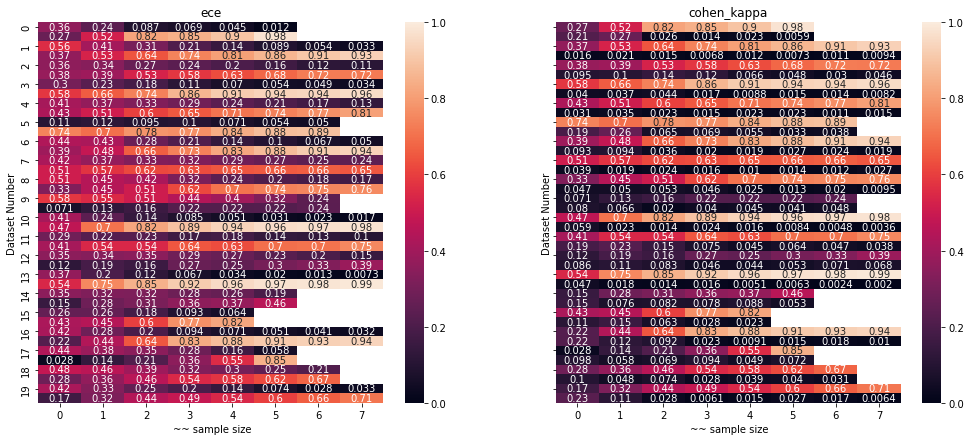

In [17]:
fig, axs = plt.subplots(1,2, figsize = (17,7), sharey = True)
ax = axs[0]
sns.heatmap(means_dfs['ece']['GBDT'],annot = True, ax= ax,  vmin=0, vmax=1)
ax.set_ylabel('Dataset Number')
ax.set_xlabel(' ~~ sample size');
ax.set_title('ece')
ax2 = axs[1]
sns.heatmap(means_dfs['cohen_kappa']['GBDT'],annot = True, ax= ax2,  vmin=0, vmax=1)
ax2.set_ylabel('Dataset Number')
ax2.set_xlabel(' ~~ sample size');
ax2.set_title('cohen_kappa');